### **Importar Bibliotecas**

In [121]:
import pandas as pd
import matplotlib.pyplot as plt
from itertools import combinations
import math
import time
import heapq
from datetime import timedelta
import os
from typing import Dict, List, Tuple, Set

### **Constantes Globais**

In [122]:
# Velocidade média de caminhada (metros por segundo)
WALKING_SPEED = 1.38

# Fatores de emissão (mg CO2 por m)
EMISSION_FACTORS = {
    'metro': 40.0,  # Baseado em 40 g/km
    'bus': 109.9, # Baseado em 109.9 g/km
    'walk': 0.0
}
# Tipos de rota
ROUTE_TYPE = {
    0: 'metro',
    1: 'metro', 
    2: 'bus', 
    3: 'bus'
}
DEFAULT_MODE = 'walk'

### **Carregamento de Dados**

In [123]:
# Carregamento dos dados (bus)
agency_bus = pd.read_csv(r'C:\Users\Luimp\Documents\Python\CIN\project\bus\agency.txt', sep=',')
calendar_dates_bus = pd.read_csv(r'C:\Users\Luimp\Documents\Python\CIN\project\bus\calendar_dates.txt', sep=',')
calendar_bus = pd.read_csv(r'C:\Users\Luimp\Documents\Python\CIN\project\bus\calendar.txt', sep=',')
routes_bus = pd.read_csv(r'C:\Users\Luimp\Documents\Python\CIN\project\bus\routes.txt', sep=',')
shapes_bus = pd.read_csv(r'C:\Users\Luimp\Documents\Python\CIN\project\bus\shapes.txt', sep=',')
stop_times_bus = pd.read_csv(r'C:\Users\Luimp\Documents\Python\CIN\project\bus\stop_times.txt', sep=',')
stops_bus = pd.read_csv(r'C:\Users\Luimp\Documents\Python\CIN\project\bus\stops.txt', sep=',')
trips_bus = pd.read_csv(r'C:\Users\Luimp\Documents\Python\CIN\project\bus\trips.txt', sep=',')
transfers_bus = pd.read_csv(r'C:\Users\Luimp\Documents\Python\CIN\project\bus\transfers.txt', sep=',')

In [124]:
# Carregamento dos dados (transit)
agency_transit = pd.read_csv(r'C:\Users\Luimp\Documents\Python\CIN\project\transit\agency.txt', sep=',')
calendar_dates_transit = pd.read_csv(r'C:\Users\Luimp\Documents\Python\CIN\project\transit\calendar_dates.txt', sep=',')
calendar_transit = pd.read_csv(r'C:\Users\Luimp\Documents\Python\CIN\project\transit\calendar.txt', sep=',')
fare_attributes = pd.read_csv(r'C:\Users\Luimp\Documents\Python\CIN\project\transit\fare_attributes.txt', sep=',')
fare_rules = pd.read_csv(r'C:\Users\Luimp\Documents\Python\CIN\project\transit\fare_rules.txt', sep=',')
routes_transit = pd.read_csv(r'C:\Users\Luimp\Documents\Python\CIN\project\transit\routes.txt', sep=',')
shapes_transit = pd.read_csv(r'C:\Users\Luimp\Documents\Python\CIN\project\transit\shapes.txt', sep=',')
stop_times_transit = pd.read_csv(r'C:\Users\Luimp\Documents\Python\CIN\project\transit\stop_times.txt', sep=',')
stops_transit = pd.read_csv(r'C:\Users\Luimp\Documents\Python\CIN\project\transit\stops.txt', sep=',')
trips_transit = pd.read_csv(r'C:\Users\Luimp\Documents\Python\CIN\project\transit\trips.txt', sep=',')
transfers_transit = pd.read_csv(r'C:\Users\Luimp\Documents\Python\CIN\project\transit\transfers.txt', sep=',')

### **Visualização dos Dados**

#### Bus

In [125]:
agency_bus

,agency_id,agency_name,agency_url,agency_timezone,agency_lang
0,STCP,Sociedade Transportes Colectivos do Porto,http://www.stcp.pt,Europe/Lisbon,pt


In [126]:
calendar_bus

,service_id,monday,tuesday,wednesday,thursday,friday,saturday,sunday,start_date,end_date
0,UTEIS,1,1,1,1,1,0,0,20250422,20251231
1,SAB,0,0,0,0,0,1,0,20250422,20251231
2,DOM,0,0,0,0,0,0,1,20250422,20251231
3,UTEISFE,1,1,1,1,1,0,0,20250411,20250421
4,SABFE,0,0,0,0,0,1,0,20250411,20250421
5,DOMFE,0,0,0,0,0,0,1,20250411,20250421
6,ELECUTEIS,1,1,1,1,1,0,0,20221226,20251231
7,ELECSAB,0,0,0,0,0,1,0,20221226,20251231
8,ELECDOM,0,0,0,0,0,0,1,20221226,20251231


In [127]:
calendar_dates_bus

,service_id,date,exception_type
0,UTEISFE,20250418,2
1,SABFE,20250418,1
2,UTEIS,20250425,2
3,DOM,20250425,1
4,UTEIS,20250501,2
5,DOM,20250501,1
6,UTEIS,20250610,2
7,DOM,20250610,1


In [128]:
routes_bus

,route_id,route_short_name,route_long_name,route_desc,route_type,route_url,route_color,route_text_color
0,200,200,Bolhão - Cast. Queijo,NaN,3,http://www.stcp.pt/pt/viajar/linhas/?linha=200,187EC2,FFFFFF
1,201,201,Aliados - Viso,NaN,3,http://www.stcp.pt/pt/viajar/linhas/?linha=201,187EC2,FFFFFF
2,203,203,Marquês - Cast.Queijo,NaN,3,http://www.stcp.pt/pt/viajar/linhas/?linha=203,187EC2,FFFFFF
3,204,204,Hospital De S.João - Foz,NaN,3,http://www.stcp.pt/pt/viajar/linhas/?linha=204,187EC2,FFFFFF
4,205,205,Campanhã - Castelo Do Queijo,NaN,3,http://www.stcp.pt/pt/viajar/linhas/?linha=205,187EC2,FFFFFF
...,...,...,...,...,...,...,...,...
68,11M,11M,Hosp. S. João - Coimbrões,NaN,3,http://www.stcp.pt/pt/viajar/linhas/?linha=11M,000000,FFFFFF
69,12M,12M,Av.Aliados - Sto.Ovídio,NaN,3,http://www.stcp.pt/pt/viajar/linhas/?linha=12M,000000,FFFFFF
70,13M,13M,Av.Aliados - Matosinhos (Mercado),NaN,3,http://www.stcp.pt/pt/viajar/linhas/?linha=13M,000000,FFFFFF
71,202,202,Aliados - Passeio Alegre (via Av. Bessa),NaN,3,http://www.stcp.pt/pt/viajar/linhas/?linha=202,187EC2,FFFFFF


In [129]:
shapes_bus

,shape_id,shape_pt_lat,shape_pt_lon,shape_pt_sequence
0,1_0_1_shp,41.140801,-8.615485,1
1,1_0_1_shp,41.140652,-8.615913,2
2,1_0_1_shp,41.140588,-8.616105,3
3,1_0_1_shp,41.140568,-8.616204,4
4,1_0_1_shp,41.140558,-8.616319,5
...,...,...,...,...
39030,9M_1_1_shp,41.147556,-8.609425,237
39031,9M_1_1_shp,41.147843,-8.610942,238
39032,9M_1_1_shp,41.147888,-8.611286,239
39033,9M_1_1_shp,41.147848,-8.611296,240


In [130]:
stops_bus

,stop_id,stop_code,stop_name,stop_lat,stop_lon,zone_id,stop_url
0,CRG2,CRG2,CORGA,41.209880,-8.575228,MAI4,http://www.stcp.pt/pt/viajar/paragens/?t=detal...
1,FMGO3,FMGO3,FORMIGUEIRO,41.205222,-8.586722,MAI4,http://www.stcp.pt/pt/viajar/paragens/?t=detal...
2,MRT2,MRT2,MIRANTE,41.213370,-8.563202,MAI4,http://www.stcp.pt/pt/viajar/paragens/?t=detal...
3,FMGO4,FMGO4,FORMIGUEIRO,41.205350,-8.586645,MAI4,http://www.stcp.pt/pt/viajar/paragens/?t=detal...
4,PCUA1,PCUA1,PÍCUA,41.204598,-8.569305,MAI4,http://www.stcp.pt/pt/viajar/paragens/?t=detal...
...,...,...,...,...,...,...,...
2497,TLHR1,TLHR1,TELHEIRA,41.178266,-8.613936,PRT3,http://www.stcp.pt/pt/viajar/paragens/?t=detal...
2498,AVC1,AVC1,AVAL CIMA,41.168423,-8.603409,PRT1,http://www.stcp.pt/pt/viajar/paragens/?t=detal...
2499,DAH2,DAH2,D.AFONSO HENRIQUES,41.172398,-8.681619,PRT2,http://www.stcp.pt/pt/viajar/paragens/?t=detal...
2500,FCH1,FCH1,FUNCHAL,41.163126,-8.683408,PRT2,http://www.stcp.pt/pt/viajar/paragens/?t=detal...


In [131]:
stop_times_bus

,trip_id,arrival_time,departure_time,stop_id,stop_sequence,stop_headsign
0,107_1_D_1,6:40:00,6:40:00,AREI2,1,NaN
1,107_1_D_1,6:40:32,6:40:32,JD4,2,NaN
2,107_1_D_1,6:41:27,6:41:27,PNG4,3,NaN
3,107_1_D_1,6:42:22,6:42:22,TVA2,4,NaN
4,107_1_D_1,6:43:15,6:43:15,AZV,5,NaN
...,...,...,...,...,...,...
901084,9M_1_U_11,5:53:58,5:53:58,DQL1,37,NaN
901085,9M_1_U_11,5:54:55,5:54:55,ALXH3,38,NaN
901086,9M_1_U_11,5:55:35,5:55:35,BTLH1,39,NaN
901087,9M_1_U_11,5:57:07,5:57:07,PRDJ,40,NaN


In [132]:
trips_bus

,route_id,direction_id,service_id,trip_id,trip_headsign,wheelchair_accessible,block_id,shape_id
0,107,0,UTEIS,107_0_U_29,Areias,1,NaN,107_0_1_shp
1,107,1,UTEIS,107_1_U_30,Estádio do Dragão,1,NaN,107_1_1_shp
2,107,0,UTEIS,107_0_U_31,Areias,1,NaN,107_0_1_shp
3,107,1,UTEIS,107_1_U_32,Estádio do Dragão,1,NaN,107_1_1_shp
4,107,0,UTEIS,107_0_U_33,Areias,1,NaN,107_0_1_shp
...,...,...,...,...,...,...,...,...
25176,9M,1,DOM,9M_1_D_7,Av. Aliados,1,NaN,9M_1_1_shp
25177,9M,0,DOM,9M_0_D_8,Gondomar (via TIC),1,NaN,9M_0_1_shp
25178,9M,1,DOM,9M_1_D_9,Av. Aliados,1,NaN,9M_1_1_shp
25179,9M,0,DOM,9M_0_D_10,Gondomar (via TIC),1,NaN,9M_0_1_shp


In [133]:
transfers_bus

,from_stop_id,to_stop_id,transfer_type
0,PARR2,CHAS3,3
1,ALFG1,FTN2,3
2,INF1,FTN2,3
3,ALFG5,FTN2,3
4,RBRI1,FTN2,3
...,...,...,...
477,AAL2,AAL4,1
478,AL7,AAL2,1
479,AAL4,AAL2,1
480,AAL1,AAL2,1


#### Transit

In [134]:
agency_transit

,agency_id,agency_name,agency_url,agency_timezone,agency_lang
0,NaN,Metro do Porto,https://www.metrodoporto.pt,Europe/Lisbon,pt


In [135]:
calendar_dates_transit

,service_id,date,exception_type
0,ADF,20251005,1
1,AS,20251005,2
2,AU,20251005,2
3,BDF,20251005,1
4,BexDF,20251005,1
...,...,...,...
286,EU,20260604,2
287,FDF,20260604,1
288,FS,20260604,2
289,FU,20260604,2


In [136]:
calendar_transit

,service_id,monday,tuesday,wednesday,thursday,friday,saturday,sunday,start_date,end_date
0,BDF,0,0,0,0,0,0,1,20250908,20260801
1,CDF,0,0,0,0,0,0,1,20250908,20260801
2,DDF,0,0,0,0,0,0,1,20250908,20260801
3,FDF,0,0,0,0,0,0,1,20250908,20260801
4,EDF,0,0,0,0,0,0,1,20250908,20260801
5,ADF,0,0,0,0,0,0,1,20250908,20260801
6,BS,0,0,0,0,0,1,0,20250908,20260801
7,CS,0,0,0,0,0,1,0,20250908,20260801
8,DS,0,0,0,0,0,1,0,20250908,20260801
9,FS,0,0,0,0,0,1,0,20250908,20260801


In [137]:
fare_attributes

,fare_id,price,currency_type,payment_method,transfers,transfer_duration
0,Z2,1.40,EUR,1,NaN,NaN
1,Z3,1.80,EUR,1,NaN,NaN
2,Z4,2.25,EUR,1,NaN,NaN
3,Z5,2.75,EUR,1,NaN,NaN
4,Z6,3.20,EUR,1,NaN,NaN
5,Z7,3.65,EUR,1,NaN,NaN


In [138]:
fare_rules

,fare_id,route_id,origin_id,destination_id
0,Z2,NaN,PRT1,PRT1
1,Z2,NaN,PRT1,PRT2
2,Z2,NaN,PRT1,PRT3
3,Z2,NaN,PRT1,VNG1
4,Z2,NaN,PRT2,PRT1
...,...,...,...,...
170,Z4,NaN,MAI4,VNG2
171,Z5,NaN,VCD8,VNG2
172,Z5,NaN,MAI2,VNG2
173,Z6,NaN,VCD3,VNG2


In [139]:
routes_transit

,route_id,agency_id,route_short_name,route_long_name,route_desc,route_type,route_url,route_color,route_text_color
0,A,NaN,A,-,NaN,1,NaN,199FDA,FFFFFF
1,B,NaN,B,-,NaN,1,NaN,C63920,FFFFFF
2,Bexp,NaN,Bx,-,NaN,1,NaN,C63920,FFFFFF
3,C,NaN,C,-,NaN,1,NaN,A3BE31,FFFFFF
4,D,NaN,D,-,NaN,1,NaN,EBBC14,FFFFFF
5,E,NaN,E,-,NaN,1,NaN,736EB0,FFFFFF
6,F,NaN,F,-,NaN,1,NaN,EE731C,FFFFFF


In [140]:
shapes_transit

,shape_id,shape_pt_lat,shape_pt_lon,shape_pt_sequence,shape_dist_traveled
0,BG,41.160717,-8.582416,0,NaN
1,BG,41.150536,-8.586245,1,NaN
2,BG,41.146698,-8.592978,2,NaN
3,BG,41.148796,-8.598349,3,NaN
4,BG,41.149784,-8.605901,4,NaN
...,...,...,...,...,...
327,FR,41.183453,-8.553955,28,NaN
328,FR,41.185570,-8.545892,29,NaN
329,FR,41.179825,-8.543604,30,NaN
330,FR,41.175156,-8.541962,31,NaN


In [141]:
stop_times_transit

,trip_id,arrival_time,departure_time,stop_id,stop_sequence,stop_headsign,pickup_type,drop_off_type,shape_dist_traveled
0,BDF0,5:54:00,5:54:00,5708,0,NaN,NaN,NaN,NaN
1,BDF0,5:57:00,5:57:00,5703,1,NaN,NaN,NaN,NaN
2,BDF0,5:59:00,5:59:00,5712,2,NaN,NaN,NaN,NaN
3,BDF0,6:00:00,6:00:00,5697,3,NaN,NaN,NaN,NaN
4,BDF0,6:01:00,6:01:00,5699,4,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
64312,FU154,24:59:00,24:59:00,5702,28,NaN,NaN,NaN,NaN
64313,FU154,25:00:00,25:00:00,5698,29,NaN,NaN,NaN,NaN
64314,FU154,25:02:00,25:02:00,5705,30,NaN,NaN,NaN,NaN
64315,FU154,25:04:00,25:04:00,5728,31,NaN,NaN,NaN,NaN


In [142]:
stops_transit 

,stop_id,stop_code,stop_name,stop_desc,stop_lat,stop_lon,zone_id,stop_url
0,5697,NaN,24 de Agosto,NaN,41.14880,-8.598349,PRT1,NaN
1,5698,NaN,Baguim,NaN,41.18557,-8.545892,MAI4,NaN
2,5699,NaN,Bolhão,NaN,41.14978,-8.605901,PRT1,NaN
3,5700,NaN,Brito Capelo,NaN,41.18391,-8.691469,MTS1,NaN
4,5701,NaN,Câmara Matosinhos,NaN,41.18070,-8.681227,MTS1,NaN
...,...,...,...,...,...,...,...,...
80,5791,NaN,Hospital São João,NaN,41.18326,-8.602240,PRT3,NaN
81,5792,NaN,Santo Ovídio,NaN,41.11555,-8.606555,VNG1,NaN
82,5811,NaN,Hospital Santos Silva,NaN,41.10576,-8.591075,VNG2,NaN
83,5812,NaN,Manuel Leão,NaN,41.11066,-8.599958,VNG1,NaN


In [143]:
trips_transit

,route_id,service_id,trip_id,trip_headsign,direction_id,block_id,wheelchair_accessible,shape_id
0,B,BDF,BDF0,Póvoa de Varzim,0,NaN,1,BG
1,B,BDF,BDF1,Póvoa de Varzim,0,NaN,1,BG
2,B,BDF,BDF2,Póvoa de Varzim,0,NaN,1,BG
3,B,BDF,BDF3,Póvoa de Varzim,0,NaN,1,BG
4,B,BDF,BDF4,Póvoa de Varzim,0,NaN,1,BG
...,...,...,...,...,...,...,...,...
2936,F,FU,FU150,Fânzeres,1,NaN,1,FR
2937,F,FU,FU151,Fânzeres,1,NaN,1,FR
2938,F,FU,FU152,Fânzeres,1,NaN,1,FR
2939,F,FU,FU153,Fânzeres,1,NaN,1,FR


In [144]:
transfers_transit

,from_stop_id,to_stop_id,transfer_type
0,5726,5726,0
1,5724,5724,0
2,5737,5737,0


### **Funções Auxiliares**

In [145]:
def haversine_distance(lat1: float, lon1: float, lat2: float, lon2: float) -> float:
    """Calcula a distância em metros entre duas coordenadas GPS."""
    R = 6371000  # Raio da Terra em metros
    phi1 = math.radians(lat1)
    phi2 = math.radians(lat2)
    delta_phi = math.radians(lat2 - lat1)
    delta_lambda = math.radians(lon2 - lon1)

    a = math.sin(delta_phi / 2.0) ** 2 + \
        math.cos(phi1) * math.cos(phi2) * \
        math.sin(delta_lambda / 2.0) ** 2
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))
    
    return R * c  # Distância em metros

In [146]:
def calculate_walk_time_sec(distance_meters: float) -> float:
    """Calcula o tempo de caminhada em segundos."""
    return distance_meters / WALKING_SPEED

In [147]:
def hms_to_sec(hms_str: str) -> int:
    """Converte 'HH:MM:SS' (incluindo > 24h) para segundos."""
    try:
        parts = hms_str.split(':')
        return int(parts[0]) * 3600 + int(parts[1]) * 60 + int(parts[2])
    except:
        return 0 # Lidar com tempos inválidos se houver

### **Tratamento dos Dados**

In [148]:
# Unificar Paragens

# Selecionar colunas relevantes e adicionar prefixo de 'Bus'
stops_bus_f = stops_bus[['stop_id', 'stop_name', 'stop_lat', 'stop_lon']].copy()
stops_bus_f['stop_id'] = 'B-' + stops_bus_f['stop_id'].astype(str)

# Selecionar colunas relevantes e adicionar prefixo de 'Metro'
stops_transit_f = stops_transit[['stop_id', 'stop_name', 'stop_lat', 'stop_lon']].copy()
stops_transit_f['stop_id'] = 'M-' + stops_transit_f['stop_id'].astype(str)

# Combinar todas as paragens num único DataFrame
stops = pd.concat([stops_bus_f, stops_transit_f], ignore_index=True)

# Criar um dicionário para lookup rápido de coordenadas (útil mais tarde)
stops_lookup = stops.set_index('stop_id').to_dict('index')

print(f"Total de paragens unificadas: {len(stops)}")
print(stops.head())

Total de paragens unificadas: 2587
   stop_id    stop_name   stop_lat  stop_lon
0   B-CRG2        CORGA  41.209880 -8.575228
1  B-FMGO3  FORMIGUEIRO  41.205222 -8.586722
2   B-MRT2      MIRANTE  41.213370 -8.563202
3  B-FMGO4  FORMIGUEIRO  41.205350 -8.586645
4  B-PCUA1        PÍCUA  41.204598 -8.569305


In [149]:
# Inicializar o grafo. Cada paragem é um nó.
grafo = {stop_id: [] for stop_id in stops_lookup.keys()}

# Definir uma aresta-tipo: (destino, tempo_s, co2_mg, modo, distancia_m)
# modo = 'walk', 'bus', 'metro'

MAX_WALK_DIST_METERS = 500  # Máx. 500m para transferências a pé
WALKING_SPEED = 1.38        # m/s (do seu notebook)

print("Iniciando construção de arestas de caminhada (isto pode demorar)...")

# Use o %%time magic no Jupyter para medir o tempo
# %%time 

for stop_id_1, stop_id_2 in combinations(stops_lookup.keys(), 2):
    stop1 = stops_lookup[stop_id_1]
    stop2 = stops_lookup[stop_id_2]
    
    dist = haversine_distance(stop1['stop_lat'], stop1['stop_lon'], 
                              stop2['stop_lat'], stop2['stop_lon'])
    
    if dist <= MAX_WALK_DIST_METERS:
        walk_time_sec = calculate_walk_time_sec(dist)
        
        # Adicionar aresta nos dois sentidos (grafo não-direcionado)
        # (destino, tempo, co2, modo, distancia)
        aresta_1_2 = (stop_id_2, walk_time_sec, 0.0, 'walk', dist)
        aresta_2_1 = (stop_id_1, walk_time_sec, 0.0, 'walk', dist)
        
        grafo[stop_id_1].append(aresta_1_2)
        grafo[stop_id_2].append(aresta_2_1)

print("Arestas de caminhada construídas.")

Iniciando construção de arestas de caminhada (isto pode demorar)...
Arestas de caminhada construídas.


In [150]:
# Arestas de Transporte (Bus e Metro)

def add_transport_links(grafo, stop_times_df, trips_df, prefix, modo_base):
    print(f"Adicionando ligações para: {modo_base}")
    
    # Juntar stop_times com trips para filtrar apenas as que precisamos
    # Otimização: pré-filtrar stop_times para trips que estão em trips_df
    trips_validos = set(trips_df['trip_id'])
    stop_times_f = stop_times_df[stop_times_df['trip_id'].isin(trips_validos)].copy()

    # Converter tempos para segundos (demora um pouco)
    stop_times_f['departure_sec'] = stop_times_f['departure_time'].apply(hms_to_sec)
    stop_times_f['arrival_sec'] = stop_times_f['arrival_time'].apply(hms_to_sec)
    
    # Agrupar por viagem, ordenar por sequência
    grouped_trips = stop_times_f.sort_values('stop_sequence').groupby('trip_id')
    
    links_added = 0
    for trip_id, trip_stops in grouped_trips:
        # Iterar pelas paragens da viagem, de n para n+1
        for i in range(len(trip_stops) - 1):
            stop_n = trip_stops.iloc[i]
            stop_n1 = trip_stops.iloc[i+1]
            
            from_stop_id = prefix + str(stop_n['stop_id'])
            to_stop_id = prefix + str(stop_n1['stop_id'])
            
            # Garantir que as paragens existem no nosso lookup
            if from_stop_id not in stops_lookup or to_stop_id not in stops_lookup:
                continue

            # Calcular Tempo
            time_sec = stop_n1['arrival_sec'] - stop_n['departure_sec']
            
            # Evitar viagens no tempo (se houver dados estranhos)
            if time_sec < 0:
                continue

            # Calcular Distância e CO2
            stop_n_coords = stops_lookup[from_stop_id]
            stop_n1_coords = stops_lookup[to_stop_id]
            dist = haversine_distance(stop_n_coords['stop_lat'], stop_n_coords['stop_lon'],
                                      stop_n1_coords['stop_lat'], stop_n1_coords['stop_lon'])
            
            emission_factor = EMISSION_FACTORS.get(modo_base, 0.0)
            co2_mg = dist * emission_factor
            
            # Adicionar a aresta (grafo direcionado)
            # (destino, tempo, co2, modo, distancia)
            aresta = (to_stop_id, time_sec, co2_mg, modo_base, dist)
            grafo[from_stop_id].append(aresta)
            links_added += 1
            
    print(f"{links_added} ligações de {modo_base} adicionadas.")

# Executar para BUS
add_transport_links(grafo, stop_times_bus, trips_bus, 'B-', 'bus')

# Executar para METRO
add_transport_links(grafo, stop_times_transit, trips_transit, 'M-', 'metro')

print("\nConstrução do grafo concluída.")

Adicionando ligações para: bus
875908 ligações de bus adicionadas.
Adicionando ligações para: metro
61376 ligações de metro adicionadas.

Construção do grafo concluída.


In [151]:
# Arestas de Transferência (Explícitas)

# Nota: O seu transfers_bus não tem min_transfer_time,
# então vamos assumir que é como uma caminhada.
# O seu transfers_transit tem transfer_type=0, que é uma
# transferência na mesma estação.

print("Adicionando transferências explícitas...")

# Processar transfers_bus
for row in transfers_bus.itertuples():
    from_stop_id = 'B-' + str(row.from_stop_id)
    to_stop_id = 'B-' + str(row.to_stop_id)
    
    if from_stop_id in stops_lookup and to_stop_id in stops_lookup:
        # Assumir que é uma caminhada
        stop1 = stops_lookup[from_stop_id]
        stop2 = stops_lookup[to_stop_id]
        dist = haversine_distance(stop1['stop_lat'], stop1['stop_lon'], stop2['stop_lat'], stop2['stop_lon'])
        walk_time_sec = calculate_walk_time_sec(dist)
        
        # Adicionar como uma aresta de 'walk'
        aresta = (to_stop_id, walk_time_sec, 0.0, 'walk', dist)
        if aresta not in grafo[from_stop_id]: # Evitar duplicados
             grafo[from_stop_id].append(aresta)

# Processar transfers_transit (assumir um tempo fixo de 2 min / 120s)
for row in transfers_transit.itertuples():
    from_stop_id = 'M-' + str(row.from_stop_id)
    to_stop_id = 'M-' + str(row.to_stop_id)
    
    if from_stop_id in stops_lookup and to_stop_id in stops_lookup:
        # Assumir 120s de tempo de transferência e 0 dist/co2
        aresta = (to_stop_id, 120.0, 0.0, 'walk', 0.0) 
        if aresta not in grafo[from_stop_id]:
            grafo[from_stop_id].append(aresta)

print("Transferências explícitas adicionadas.")

Adicionando transferências explícitas...
Transferências explícitas adicionadas.



Grafo finalizado com todas as arestas.
Número total de nós no grafo: 2587
Número total de arestas no grafo: 974511


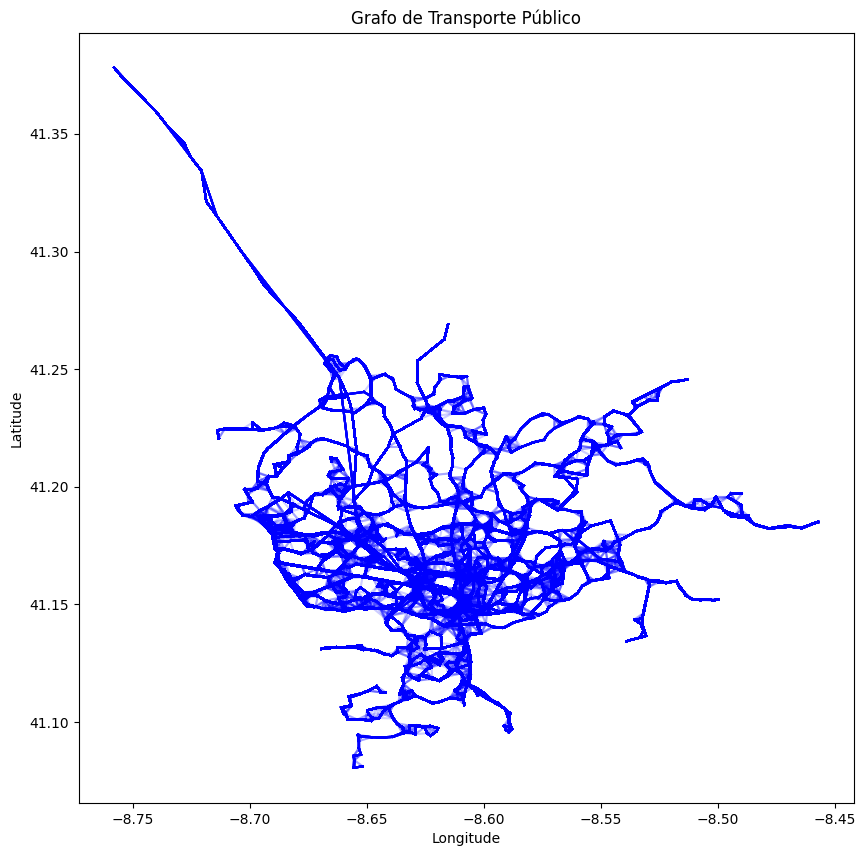

In [152]:
print("\nGrafo finalizado com todas as arestas.")
print(f"Número total de nós no grafo: {len(grafo)}")
print(f"Número total de arestas no grafo: {sum(len(v) for v in grafo.values())}")
def plot_graph(grafo):
    plt.figure(figsize=(10, 10))
    for from_stop, edges in grafo.items():
        from_coords = stops_lookup[from_stop]
        for edge in edges:
            to_stop = edge[0]
            to_coords = stops_lookup[to_stop]
            plt.plot([from_coords['stop_lon'], to_coords['stop_lon']],
                     [from_coords['stop_lat'], to_coords['stop_lat']],
                     'b-', alpha=0.1)
    
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.title('Grafo de Transporte Público')
    plt.show()
plot_graph(grafo)